Dane są związane z kampaniami marketingu bezpośredniego (rozmowy telefoniczne) Portugalskiej instytucji bankowej. Kampanie marketingowe opierały się na rozmowach telefonicznych.

Źródło danych: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing



In [62]:
# Import bibliotek
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# data = pd.read_csv('../Projekt/bank-additional-full.csv', sep=';')
data = pd.read_csv('../data/data_slm/bank-additional-full.csv', sep=';')

In [64]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [65]:
print('Zbiór zawiera {} wierszy oraz {} kolumn' .format(data.shape[0], data.shape[1]))

Zbiór zawiera 41188 wierszy oraz 21 kolumn


# Eksploracja danych

## Informacje o zmiennych:

1. dane klientów banku:
- age - wiek klienta (numeryczna)
- job - rodzaj pracy (kategoryczna:  'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown)
- marital - stan cywilny (kategoryczna:  'divorced','married','single','unknown')
- education - wykształcenie (kategoryczna: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- default - czy ma niespłacony kredyt? (kategoryczna: 'no','yes','unknown')
- housing - czy ma kredyt mieszkaniowy? (kategoryczna: 'no','yes','unknown')
- loan - czy ma osobistą pożyczkę? (kategoryczna: 'no','yes','unknown')
2. dane związane z ostatnim kontaktem w bieżącej kampanii:
- contact - typ komunikacji kontaktowej (kategoryczna: 'cellular','telephone')
- month - ostatni miesiąc kontaktu (kategoryczna: 'jan', 'feb', ..., 'nov', 'dec')
- day_of_week - ostatni dzień tygodnia kontaktu (kategoryczna: 'mon','tue','wed','thu','fri')
- duration - czas trwania ostatniego kontaktu, w sekundach (numeryczna)
- campaign - liczba kontaktów zrealizowanych podczas tej kampanii i dla tego klienta (numeryczna)
- pdays -  liczba dni, które upłynęły od ostatniego kontaktu z klientem z poprzedniej kampanii (numeryczna; 999 oznacza, że klient nie miał wcześniej kontaktu)
- previous - liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numeryczna)
- poutcome - wynik poprzedniej kampanii marketingowej  (kategoryczna: 'failure', 'nonexistent', 'success')
3. atrybuty społeczne i gospodarcze
- emp.var.rate - współczynnik zmienności wskaźników zatrudnienia (numeryczna)
- cons.price.idx: - wskaźnik cen towarów i usług konsumpcyjnych (numeryczna)
- cons.conf.idx - wskaźnik ufności konsumenckiej (numeryczna)
- euribor3m - Euro Interbank Offered Rate - stopa referencyjna oprocentowania kredytów oraz depozytów międzynarodowych, która określa stawkę procentową, po jakiej banki pożyczają sobie nawzajem pieniądze (numeryczna)
- nr.employed - liczba pracowników (numeryczna)
4. zmienna objaśniana
- y - czy klient zapisał się na lokatę terminową? (binarna: 'yes','no')


Opis i typ zmiennych w kolumnach:

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [67]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Z opisu danych wiadomo, że zmienna `duration` jest powiązana z zmienną objaśniającą i będzie usunięta z dalszej analizy.

In [68]:
data = data.drop('duration', axis=1)

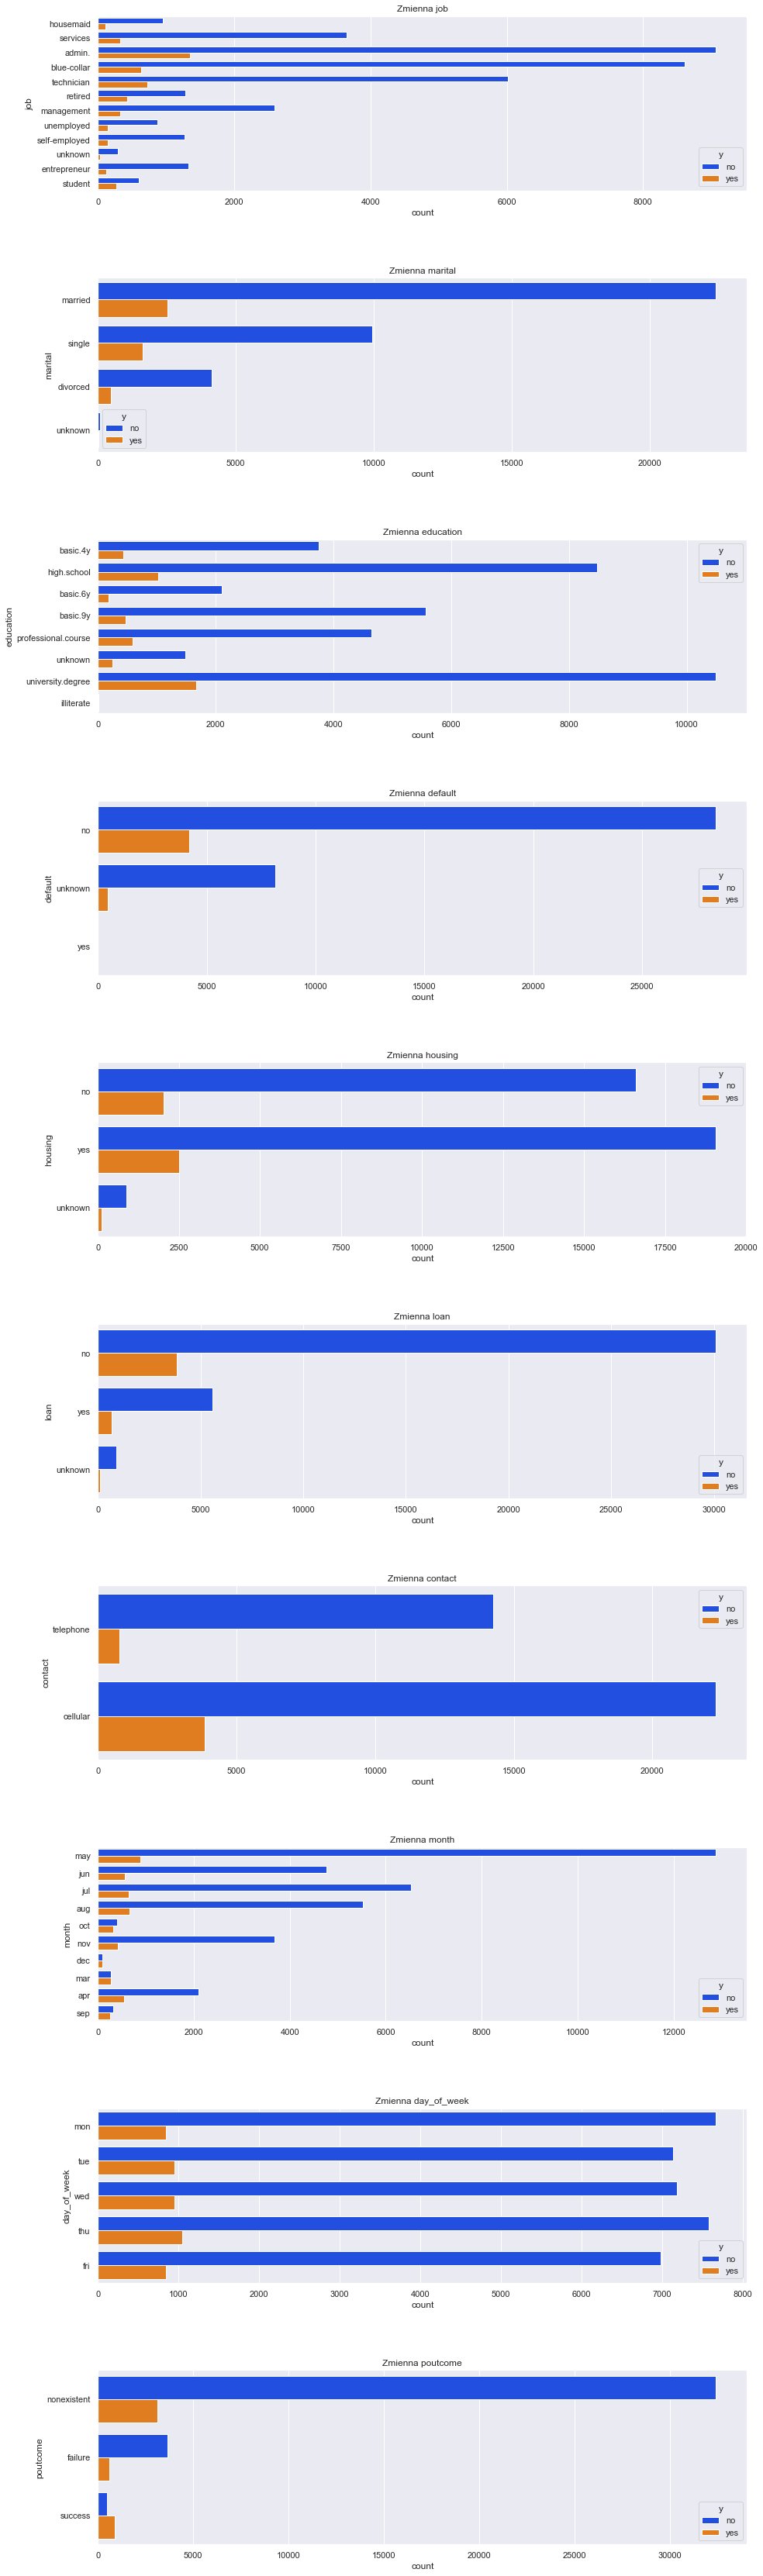

In [69]:
# Countplot
col1 = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week',
       'poutcome']

sns.set_theme(context='notebook', style='darkgrid', palette='bright')
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(15, 60))
fig.subplots_adjust(hspace=.5)
plt.title('Countplot dla zmiennych kategorycznych')

for i, col in enumerate(col1):
    sns.countplot(y=col, data=data, hue='y', ax = ax[i])
    ax[i].set_title('Zmienna {}'.format(col))

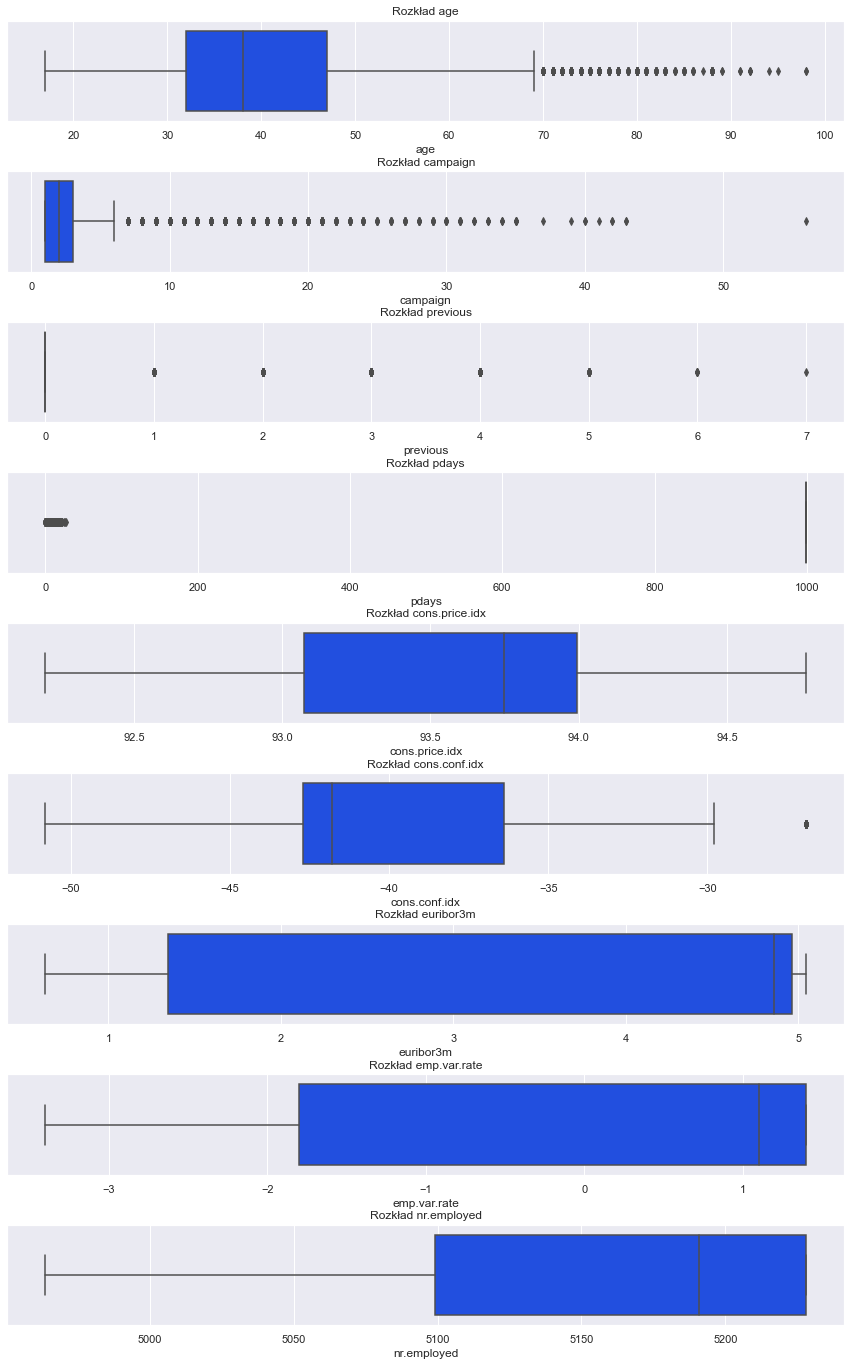

In [70]:
# Histogramy dla zmiennych 
col2 = ['age', 'campaign', 'previous', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'emp.var.rate', 'nr.employed']
sns.set_theme(context='notebook', style='darkgrid', palette='bright')
fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(15, 24)) # create subplots
fig.subplots_adjust(hspace=.5) # adjust space between plots

for i, col in enumerate(col2):
    sns.boxplot(data=data, x=data[col], ax=ax[i])
    ax[i].set_title('Rozkład {}'.format(col))

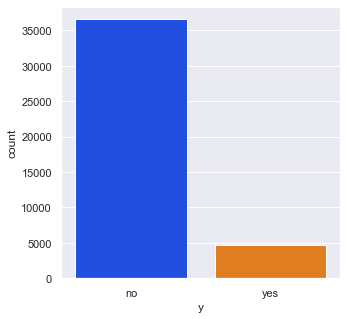

In [71]:
sns.set_theme(context='notebook', style='darkgrid', palette='bright')
fig =plt.figure(figsize=(5, 5))
sns.countplot(data=data, x='y');

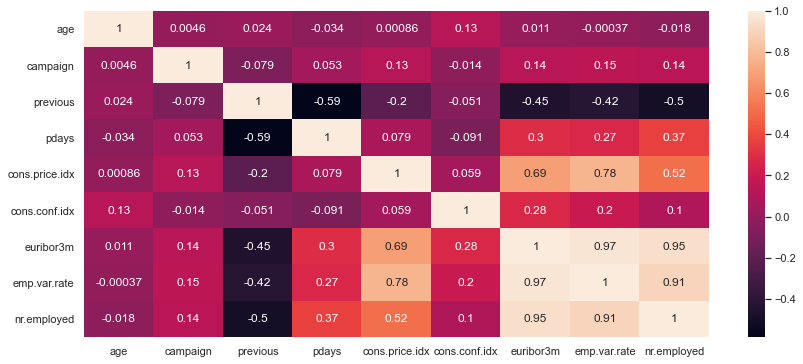

In [72]:
col3 = ['age', 'campaign', 'previous', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'emp.var.rate', 'nr.employed', 'y']
data_numeric = data[col3]
plt.figure(figsize=(14,6))
sns.heatmap(data_numeric.corr(), annot=True);

Na podstawie heatmapu można usunąć kilka kolumn, które mają dużą korelację pomiędzy sobą

In [73]:
data = data.drop(['pdays', 'euribor3m', 'emp.var.rate', 'nr.employed'], axis=1)

In [74]:
#gotowy dla dalszej pracy
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,93.994,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,nonexistent,94.767,-50.8,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,94.767,-50.8,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,nonexistent,94.767,-50.8,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,94.767,-50.8,yes


### Modelowanie


In [75]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, precision_score, recall_score

from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

In [76]:
#binaryzacja zmiennej celu
data['y_binarny'] = np.where(data['y'] == 'yes', 1, 0)
data = data.drop(['y'], axis=1)

In [77]:
#kodowanie zmiennych objaśniających_kategorycznych
for col_ in col1:
    data = data.join(pd.get_dummies(data[col_], drop_first=True, prefix=col_)).drop(col_, axis=1)

In [78]:
data.head()

,age,campaign,previous,cons.price.idx,cons.conf.idx,y_binarny,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,0,93.994,-36.4,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,0,93.994,-36.4,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,0,93.994,-36.4,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,0,93.994,-36.4,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,0,93.994,-36.4,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [79]:
y = data['y_binarny']
X = data.drop('y_binarny', axis=1)

In [80]:
#Podział na zbiór uczący i testowy
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

### Model regresji logistycznej

In [94]:
#Wybór modelu
model=LogisticRegression(random_state=0)

#Siatka parametrów
param_grid = [
    {'solver' : ['lbfgs','liblinear'],
     'max_iter' : [100,1000,5000]
    }
]

# propozycja 
# param_grid = {'C' : [0.001, 0.01, 0.1, 0.5, 1, 10]}
# model=LogisticRegression(random_state=0, solver='liblinear')

In [95]:
#Dobór optymalnych parametrów (siatka parametrów;walidacja krzyżowa - 3 części)
clf=GridSearchCV(model, param_grid,cv = 3)

In [96]:
#Dopasowanie optymalnego modelu do zbioru uczącego
best_model = clf.fit(X_train,y_train)

#Parametry wybranego modelu
best_model.best_params_

c:\programdata\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\programdata\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

{'max_iter': 100, 'solver': 'liblinear'}

In [97]:
#Sprawdzenie modelu na zbiorze testowym
y_pred = np.where(best_model.predict_proba(X_test)[:,1] > 0.5, 1, 0)

In [98]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

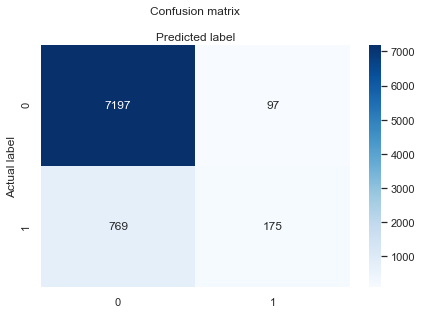

In [99]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [100]:
print("Wybrane metryki dla regresji logistycznej")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Wybrane metryki dla regresji logistycznej
Accuracy: 0.8948773974265598
Precision: 0.6433823529411765
Recall: 0.1853813559322034


Text(0.5, 1.0, 'Receiver Operating Characteristic')

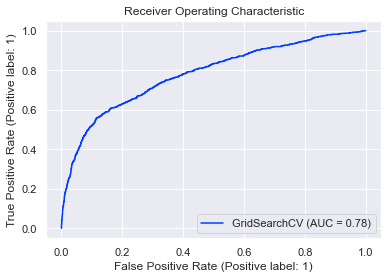

In [101]:
plot_roc_curve(best_model, X_test, y_test)
plt.title('Receiver Operating Characteristic')

### Model drzewa decyzyjnego

In [228]:
#Wybór modelu
model = DecisionTreeClassifier(random_state=0)

#Siatka parametrów
param_grid = [
    {'criterion' : ["gini","entropy"],
     'max_depth' : [1,2,3,4,5,6,7,None],
    }
]

# propozycja
# param_grid = {'max_depth' : [3, 4, 5],
#              'min_samples_split' : [10, 20, 30],
#              'min_samples_leaf' : [3, 6, 10]}

In [229]:
#Dobór optymalnych parametrów (siatka parametrów;walidacja krzyżowa - 3 części)
clf=GridSearchCV(model, param_grid, cv = 3)

In [230]:
#Dopasowanie optymalnego modelu do zbioru uczącego
best_model=clf.fit(X_train, y_train)

#Parametry wybranego modelu
best_model.best_params_

{'criterion': 'entropy', 'max_depth': 5}

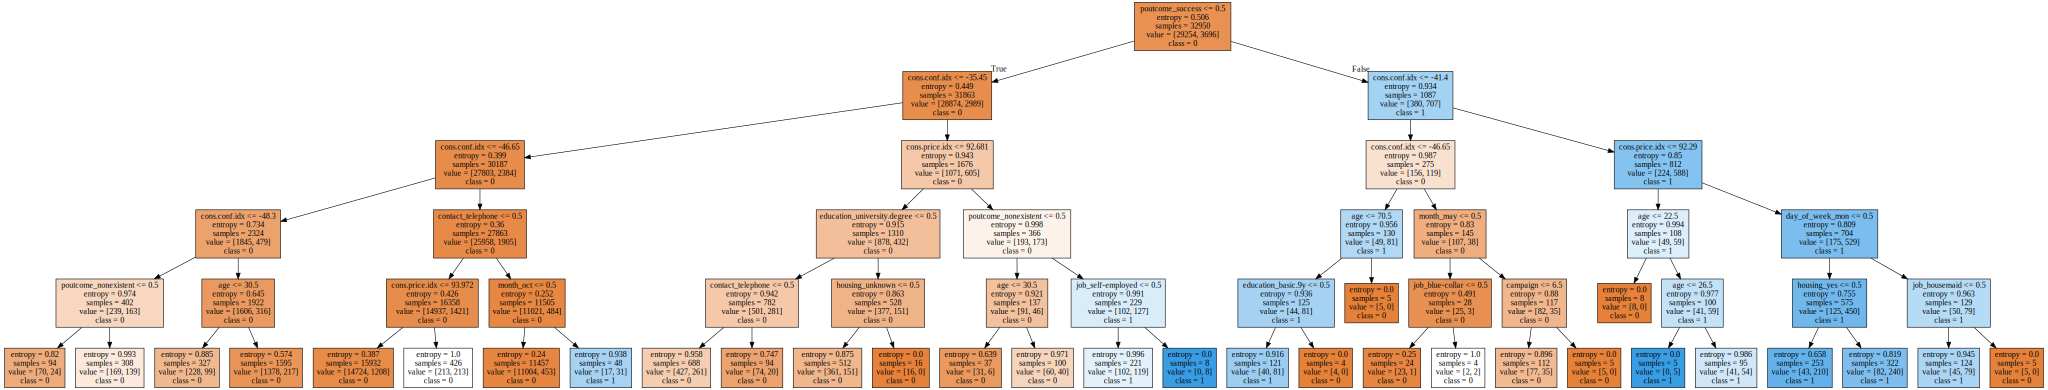

In [231]:
#Graficzna interpretacja drzewa decyzyjnego
classes = list(map(str,best_model.classes_.tolist()))
classes

dot_data = tree.export_graphviz(best_model.best_estimator_, out_file=None, 
                                feature_names=X.columns.values,  
                                class_names=classes,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [232]:
#Sprawdzenie modelu na zbiorze testowym
y_pred = best_model.predict(X_test)

In [233]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

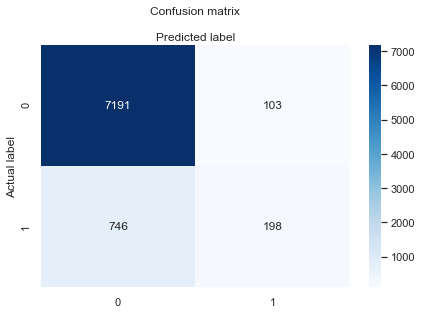

In [234]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [235]:
print("Wybrane metryki dla drzewa decyzyjnego")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Wybrane metryki dla drzewa decyzyjnego
Accuracy: 0.8969410050983249
Precision: 0.6578073089700996
Recall: 0.2097457627118644


Text(0.5, 1.0, 'Receiver Operating Characteristic')

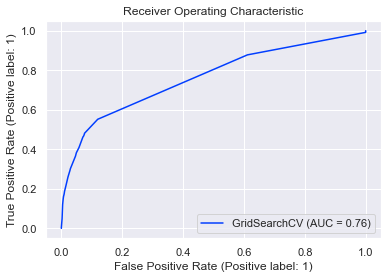

In [236]:
plot_roc_curve(best_model, X_test, y_test)
plt.title('Receiver Operating Characteristic')